##Object detection#

In object detection, the main goal is to identify and locate objects within an image. There are two primary types of object detection architectures:

   1. single-stage detectors
   2. two-stage detectors.
----------------------------------------------------------------------

  * Single-Stage Detectors (e.g., YOLO, SSD)

      Single-stage detectors are designed to perform object detection in one go, without dividing the process into multiple stages. Here's how they work:

   * a) YOLO (You Only Look Once):

         _*Architecture:*_  YOLO divides the image into a grid and predicts bounding boxes and class probabilities for each grid cell. It directly outputs the bounding boxes, objectness scores, and class probabilities for each object in the image.

      _*Process:*_  The model passes the entire image through a convolutional neural network (CNN) in a single forward pass, generating predictions for multiple objects simultaneously.

      *Speed:* YOLO is known for its speed because it processes images in a single step, making it suitable for real-time applications.

      *Accuracy:* While YOLO is fast, its accuracy can be lower in detecting smaller objects or objects that are close together, due to the coarse grid-based prediction.

   * b) SSD (Single Shot MultiBox Detector):

      *Architecture:* SSD also performs detection in a single step but differs slightly from YOLO in that it uses multiple feature maps at different scales to detect objects. This allows it to handle objects of varying sizes better.

      *Process:* SSD generates a fixed number of default bounding boxes with different aspect ratios and scales for each location in the feature maps. It then predicts the offsets for these boxes and the confidence scores for each class.

      *Speed and Accuracy:*  SSD is faster than two-stage detectors and generally provides a good balance between speed and accuracy, making it effective for a variety of real-time detection tasks.

  * Two-Stage Detectors (e.g., Faster R-CNN)

    Two-stage detectors break the detection process into two steps:

    * Region proposal
    * Classification

    * Faster R-CNN (Region-based Convolutional Neural Network):

      *First Stage:* The model generates region proposals using a Region Proposal Network (RPN). The RPN scans the image to find areas that are likely to contain objects, creating a set of bounding box proposals.

      *Second Stage:* These proposals are then refined and classified. Each proposed region is fed into a CNN, which performs two tasks: refining the bounding box coordinates and predicting the class of the object within that box.

      *Process:* Faster R-CNN first extracts feature maps from the input image using a backbone CNN. The RPN then suggests potential object regions, which are cropped from the feature map and fed into fully connected layers for classification and bounding box regression.

      *Accuracy:* Faster R-CNN is known for its high accuracy, particularly in detecting small and overlapping objects, as the two-stage process allows for more precise localization and classification.

      *Speed:* Due to the two-stage process, Faster R-CNN is typically slower than single-stage detectors, making it less suitable for real-time applications.

  * Comparison

    * *Speed:* Single-stage detectors like YOLO and SSD are faster because they perform detection in a single step. They are ideal for applications requiring real-time processing, such as video surveillance or autonomous driving.

    * *Accuracy:* Two-stage detectors like Faster R-CNN are generally more accurate, particularly for detecting small or overlapping objects. They are preferred in scenarios where accuracy is more critical than speed, such as in medical imaging or detailed object recognition tasks.

    * Each approach has its strengths and weaknesses, and the choice between them depends on the specific requirements of the application, such as the need for speed versus accuracy.

In [1]:

from PIL import Image
import cv2
from google.colab import files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yaml
from google.colab.patches import cv2_imshow
import gdown


In [2]:

# Download the entire folder
gdown.download_folder(f'https://drive.google.com/drive/folders/1YUcuariFuAOUUHaJX4-iikSshey7ggNd', quiet=False)



Retrieving folder contents


Retrieving folder 1uisvRvPYOsWwbfmvtAP2oAit3dTtpI64 photos
Processing file 1n2XiOOeykZf0PB477WrsNMjD7ZckOg0k cow_dog_detected.jpg
Processing file 1otRm9lAQQo6fZLBogWYm5XXgIoy6Kn7j cow_dog.jpg
Processing file 1SnRv7oeL8hEBZwTc4ZP-2Y-M7XF5AEn5 cow_dog.txt
Processing file 1drn4xJBUvBFHC7fVqRmBybK_riCGvqtY photo.jpg
Processing file 1IHxZiO4U4XhN9HZOyFMVh-_PliNIocxG street.jfif
Retrieving folder 1Rd8tw1RmE6tX46DccKSzjEvMc_6yM9tS train results
Processing file 14pdCAzKLiRnr8lHbsaJlK-FJFBgMeYG- events.out.tfevents.1724527582.1df35f8a9c55.863.0
Processing file 1kcBhHHJNDn66a3fSwWc3XrySZjrvh-dO hyp.yaml
Processing file 11F7VWRISgh51pl_27FJdAx23Otos8SB- labels_correlogram.jpg
Processing file 1u9Q46GAeYAVSsSZldtbcCMdePRa55vPk labels.jpg
Processing file 1vs6Va3QDTxBpz0TfpzcM53QsZFmvI0pz opt.yaml
Processing file 1Ez9Y1NUAjAWl3ceIxA3RIorFjWWda9YL README.txt
Processing file 16YgI3JlSeE9EvM-lsCkJzTWBRRmTVREn results.csv
Processing file 1umeA17TS1J-Ch9SL6lonLE5r_0tCSlAE train_batch0.jpg
Processing file 

Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1n2XiOOeykZf0PB477WrsNMjD7ZckOg0k
To: /content/Object detection/photos/cow_dog_detected.jpg
100%|██████████| 536k/536k [00:00<00:00, 101MB/s]
Downloading...
From: https://drive.google.com/uc?id=1otRm9lAQQo6fZLBogWYm5XXgIoy6Kn7j
To: /content/Object detection/photos/cow_dog.jpg
100%|██████████| 172k/172k [00:00<00:00, 76.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1SnRv7oeL8hEBZwTc4ZP-2Y-M7XF5AEn5
To: /content/Object detection/photos/cow_dog.txt
100%|██████████| 200/200 [00:00<00:00, 650kB/s]
Downloading...
From: https://drive.google.com/uc?id=1drn4xJBUvBFHC7fVqRmBybK_riCGvqtY
To: /content/Object detection/photos/photo.jpg
100%|██████████| 90.0k/90.0k [00:00<00:00, 38.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1IHxZiO4U4XhN9HZOyFMVh-_PliNIocxG
To: /content/Object detection/photos/street.jfif
100%|██████

['/content/Object detection/photos/cow_dog_detected.jpg',
 '/content/Object detection/photos/cow_dog.jpg',
 '/content/Object detection/photos/cow_dog.txt',
 '/content/Object detection/photos/photo.jpg',
 '/content/Object detection/photos/street.jfif',
 '/content/Object detection/train results/events.out.tfevents.1724527582.1df35f8a9c55.863.0',
 '/content/Object detection/train results/hyp.yaml',
 '/content/Object detection/train results/labels_correlogram.jpg',
 '/content/Object detection/train results/labels.jpg',
 '/content/Object detection/train results/opt.yaml',
 '/content/Object detection/train results/README.txt',
 '/content/Object detection/train results/results.csv',
 '/content/Object detection/train results/train_batch0.jpg',
 '/content/Object detection/train results/train_batch1.jpg',
 '/content/Object detection/train results/train_batch2.jpg',
 '/content/Object detection/val results/confusion_matrix.png',
 '/content/Object detection/val results/F1_curve.png',
 '/content/Obj

In [3]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
!pip install -r requirements.txt  # install

Cloning into 'yolov5'...
remote: Enumerating objects: 16923, done.
remote: Counting objects: 100% (118/118), done.
remote: Compressing objects: 100% (83/83), done.
remote: Total 16923 (delta 57), reused 73 (delta 35), pack-reused 16805 (from 1)
Receiving objects: 100% (16923/16923), 15.70 MiB | 27.44 MiB/s, done.
Resolving deltas: 100% (11590/11590), done.
/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 871.1/871.1 kB 39.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.5 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0


###Model training

    
    from yolov5 import train

    # Parametrləri təyin edin
    opt = {
        'data': '/content/yolov5/data/coco.yaml',  # Datasetin YAML faylı
        'weights': 'yolov5s.pt',                   # Pre-trained modelin ağırlıqları
        'img_size': 640,                           # Şəkil ölçüsü
        'batch_size': 16,                          # Batch size
        'epochs': 50,                              # Epoch sayı
        'project': '/content/yolov5/runs/train',   # Train nəticələrinin saxlanacağı folder
        'name': 'ODM_YOLOv5',                      # Model adı
    }

    # Modeli train edin
    train.run(**opt)


In [ ]:

!python /content/yolov5/train.py --data /content/yolov5/data/coco.yaml --weights yolov5s.pt --img 640 --batch-size 16 --epochs 3 --name ODM_YOLOv5




Streaming output truncated to the last 5000 lines.
        0/2      3.76G    0.04402     0.0641    0.01788        165        640:  48% 3538/7393 [39:52<43:34,  1.47it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
        0/2      3.76G    0.04402     0.0641    0.01788        200        640:  48% 3539/7393 [39:53<35:58,  1.79it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
        0/2      3.76G    0.04402     0.0641    0.01788        149        640:  48% 3540/7393 [39:53<41:42,  1.54it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
        0/2      3.76G   

###Graphical description

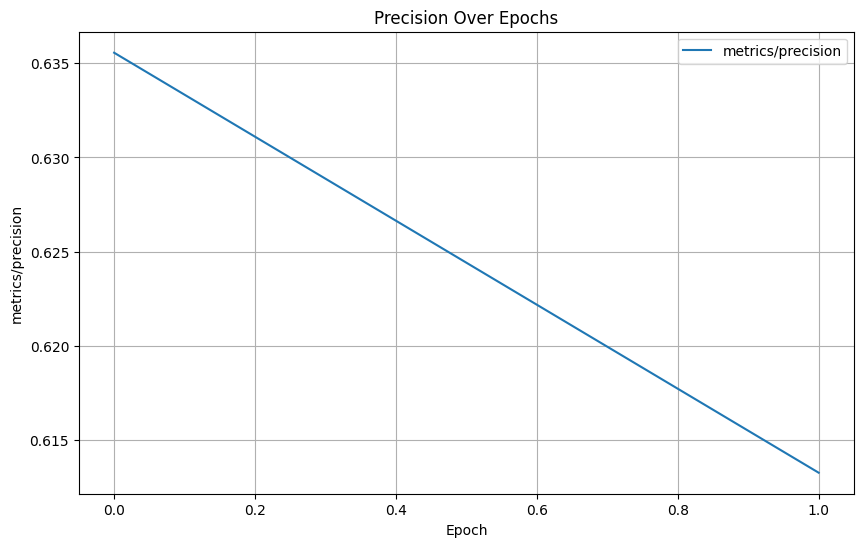

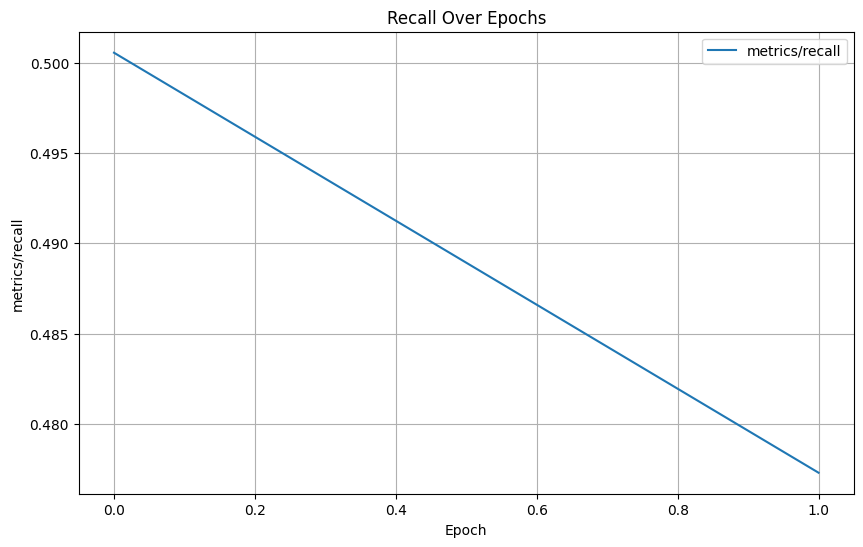

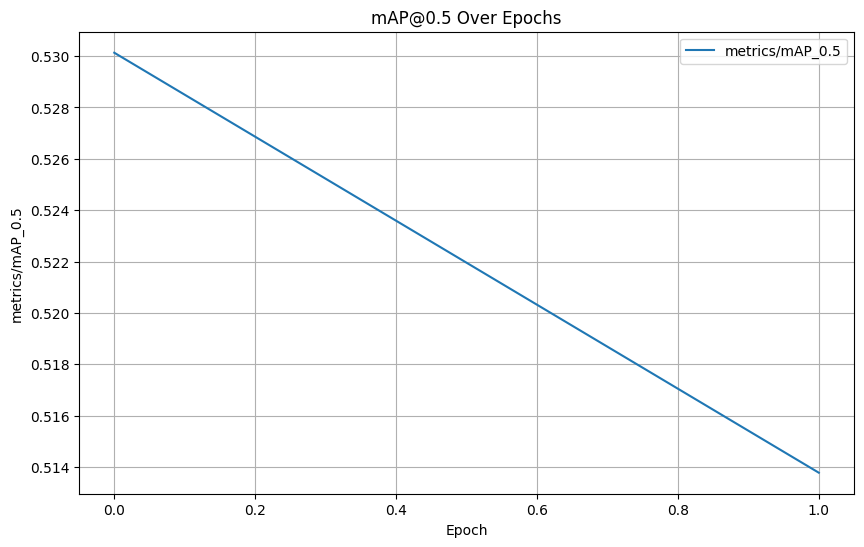

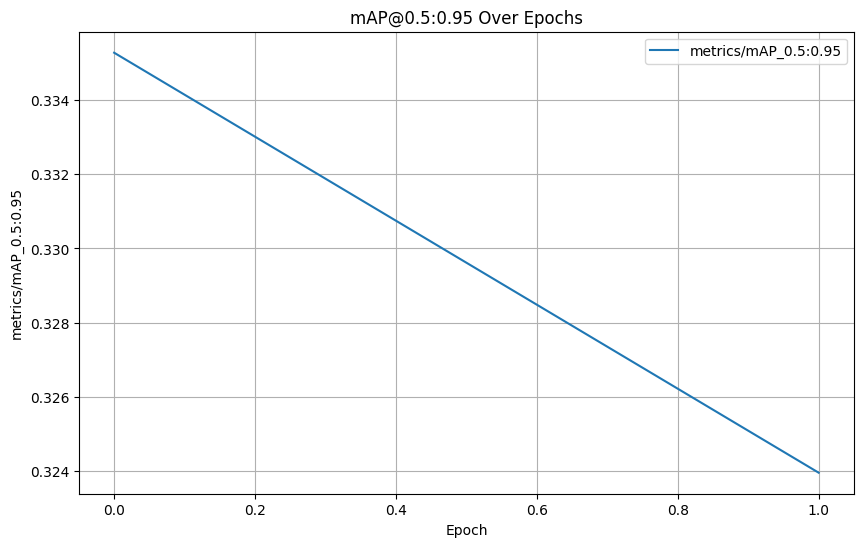

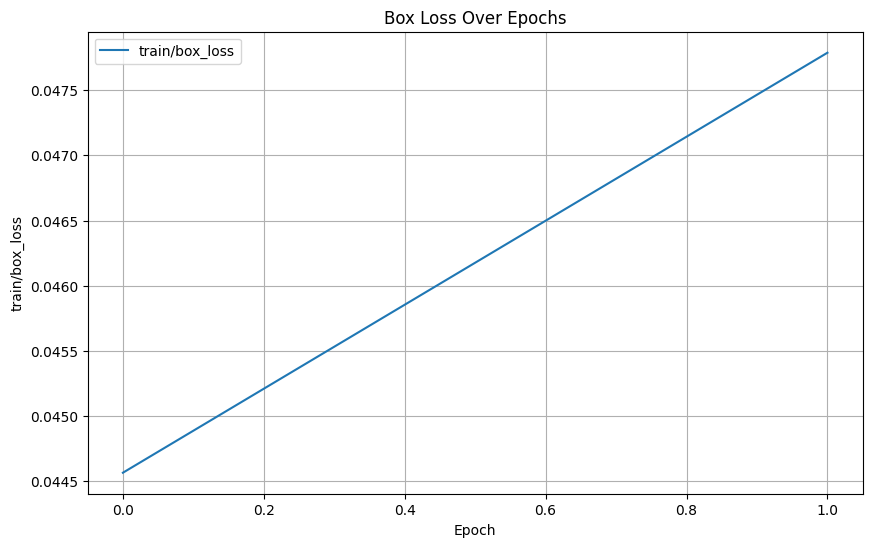

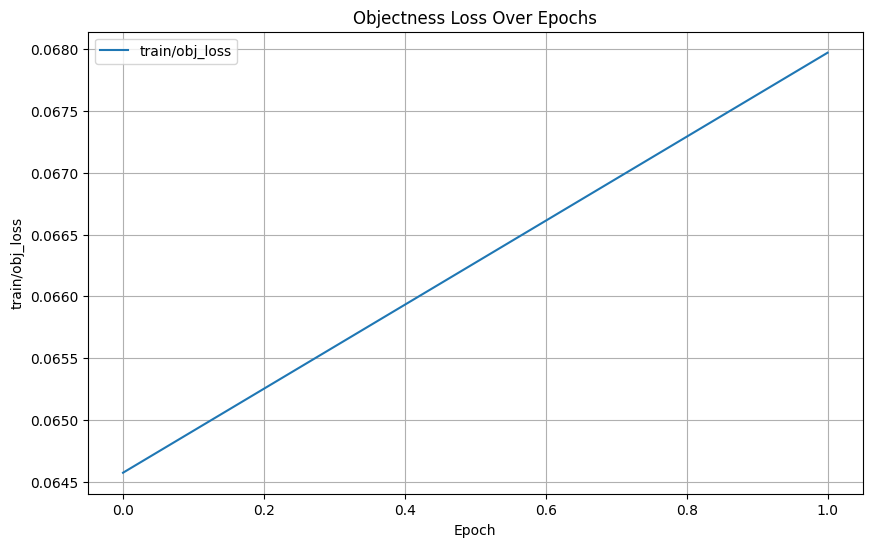

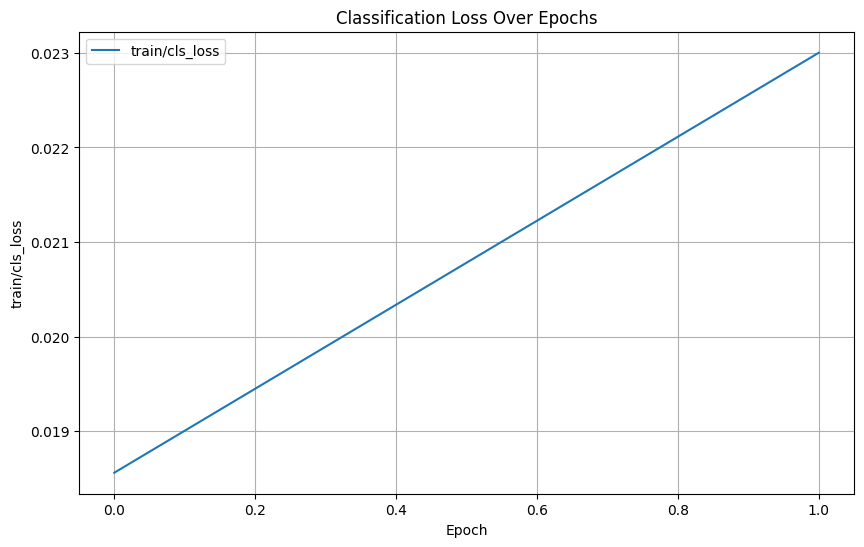

In [ ]:
# Function to plot YOLOv5 training logs (metrics, loss, etc.)
def plot_metric(metric_name, data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data[metric_name], label=metric_name)
    plt.xlabel("Epoch")
    plt.ylabel(metric_name)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Read the training results file (adjust the path if necessary)
results_path = '/content/yolov5/runs/train/ODM_YOLOv5/results.csv'

# Load the results into a DataFrame
df = pd.read_csv(results_path)

# Remove any leading or trailing whitespace from column names
df.columns = df.columns.str.strip()

# Plot some of the metrics
plot_metric('metrics/precision', df, 'Precision Over Epochs')
plot_metric('metrics/recall', df, 'Recall Over Epochs')
plot_metric('metrics/mAP_0.5', df, 'mAP@0.5 Over Epochs')
plot_metric('metrics/mAP_0.5:0.95', df, 'mAP@0.5:0.95 Over Epochs')

# Plot loss functions
plot_metric('train/box_loss', df, 'Box Loss Over Epochs')
plot_metric('train/obj_loss', df, 'Objectness Loss Over Epochs')
plot_metric('train/cls_loss', df, 'Classification Loss Over Epochs')



###Evaluation




    from yolov5 import val

    # Parametrləri təyin edin


    opt = {
        'data': '/content/yolov5/data/coco.yaml',    # Modelin test dəsti olaraq istifadə edəcəyi verilənlər dəstini göstərir.
        'weights': '/content/yolov5/runs/train/ODM_YOLOv5/weights/best.pt',    # Train edilmiş modelin ən yaxşı çəki faylını yükləyir.
        'img_size': 640,   # Modelin giriş ölçüsünü təyin edir.
        'batch_size': 16,  # Qiymətləndirmə üçün batch size dəyərini təyin edir.
    }

    # opt: Parametrləri ehtiva edən bir dictionary.

    # Qiymətləndirmə prosesini çalışdırın
    val.run(**opt)

    # val.run(**opt): Modelin test dəsti üzərində qiymətləndirməsini başladır.

In [ ]:
!python /content/yolov5/val.py --data /content/yolov5/data/coco.yaml --weights /content/yolov5/runs/train/ODM_YOLOv5/weights/best.pt --img 640 --batch-size 16


val: data=/content/yolov5/data/coco.yaml, weights=['/content/yolov5/runs/train/ODM_YOLOv5/weights/best.pt'], batch_size=16, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=True, project=yolov5/runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-356-g2070b303 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
val: Scanning /content/datasets/coco/val2017.cache... 4952 images, 48 backgrounds, 0 corrupt: 100% 5000/5000 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 313/313 [01:33<00:00,  3.34it/s]
                   all       5000      36335      0.637      0.501       0.53      0.336
Speed: 0.2ms pre-process, 5.2ms inference, 3.1ms NMS per image at shape (16, 

###Test on a sample photo



    from yolov5 import detect

    # Parametrləri təyin edin
    opt = {
        'weights': '/content/yolov5/runs/train/ODM_YOLOv5/weights/best.pt',    # Train edilmiş modelin ən yaxşı çəki faylını yükləyir.
        'source': '/content/sample_image.jpg',   # Aşkarlama üçün istifadə ediləcək görüntünü göstərir.
        'img_size': 640,   # Modelin giriş ölçüsünü təyin edir.
        'conf_thres': 0.25,     # Etibarlılıq dəyəri 0.25 və ya daha yüksək olan aşkarlamaları saxlayır.
        'save_txt': True,       # Aşkarlama nəticələrini .txt faylı olaraq saxlayır.
        'save_conf': True,      # Aşkarlama nəticələrinə etibarlılıq dəyərini əlavə edir.
        'project': '/content/yolov5/runs/detect',
        'name': 'object_detection_sample',     # Nəticələrin saxlanılacağı qovluğun adını təyin edir.
    }

    # Detection prosesini çalışdırın
    detect.run(**opt)
    
    # detect.run(**opt): Nümunə üzərində obyekt aşkarlanmasını həyata keçirir.

In [1]:
!python /content/yolov5/detect.py --weights /content/yolov5/runs/train/ODM_YOLOv5/weights/best.pt --img 640 --conf 0.25 --source '/content/Object detection/photos/cow_dog.jpg' --name object_detection_sample --save-txt --save-conf


Traceback (most recent call last):
  File "/content/yolov5/detect.py", line 46, in <module>
    from ultralytics.utils.plotting import Annotator, colors, save_one_box
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/__init__.py", line 10, in <module>
    from ultralytics.data.explorer.explorer import Explorer
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/data/__init__.py", line 3, in <module>
    from .base import BaseDataset
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/data/base.py", line 17, in <module>
    from ultralytics.data.utils import FORMATS_HELP_MSG, HELP_URL, IMG_FORMATS
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/data/utils.py", line 19, in <module>
    from ultralytics.nn.autobackend import check_class_names
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/nn/__init__.py", line 3, in <module>
    from .tasks import (
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py", line 10, in <mod

###Non-Maximum Suppression (NMS)

Non-Maximum Suppression (NMS) is a technique used in object detection to filter out redundant bounding boxes by selecting only the most confident ones. Here’s how you can implement Non-Maximum Suppression (NMS) in Python:

Steps to Implement NMS:

   *   Sort the bounding boxes by their confidence scores.
   *   Iterate through the bounding boxes and compare each one with the others.
   *   Suppress the boxes that have a high Intersection over Union (IoU) with the current box.










    import numpy as np

    def iou(box1, box2):
        """
        Compute the Intersection over Union (IoU) of two bounding boxes.
        
        Parameters:
            box1: The first bounding box, list of 4 coordinates [x1, y1, x2, y2].
            box2: The second bounding box, list of 4 coordinates [x1, y1, x2, y2].
        
        Returns:
            float: IoU value.
        """
        # Calculate the (x, y) coordinates of the intersection rectangle
        x1 = max(box1[0], box2[0])
        y1 = max(box1[1], box2[1])
        x2 = min(box1[2], box2[2])
        y2 = min(box1[3], box2[3])

        # Calculate the area of intersection rectangle
        intersection_area = max(0, x2 - x1) * max(0, y2 - y1)

        # Calculate the area of both the prediction and ground-truth rectangles
        box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
        box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])

        # Calculate the Intersection over Union (IoU)
        iou_value = intersection_area / float(box1_area + box2_area - intersection_area)
        
        return iou_value

    def non_max_suppression(bboxes, iou_threshold=0.5):
        """
        Perform Non-Maximum Suppression to remove redundant bounding boxes.
        
        Parameters:
            bboxes: List of bounding boxes with their confidence scores [x1, y1, x2, y2, score].
            iou_threshold: IoU threshold for suppressing overlapping boxes.
        
        Returns:
            List of bounding boxes after applying NMS.
        """
        if len(bboxes) == 0:
            return []

        # Sort the bounding boxes by the confidence score in descending order
        bboxes = sorted(bboxes, key=lambda x: x[4], reverse=True)

        # List to store the final bounding boxes
        nms_bboxes = []

        while bboxes:
            # Get the bounding box with the highest score
            chosen_box = bboxes.pop(0)
            nms_bboxes.append(chosen_box)

            # Filter out the boxes that have a high IoU with the chosen box
            bboxes = [box for box in bboxes if iou(chosen_box, box) < iou_threshold]

        return nms_bboxes

    # Example usage:
    # Bounding boxes format: [x1, y1, x2, y2, score]
    bboxes = [
        [100, 100, 210, 210, 0.9],
        [120, 120, 230, 230, 0.8],
        [100, 100, 210, 210, 0.72],
        [200, 200, 310, 310, 0.7],
        [220, 220, 330, 330, 0.6],
    ]

    # Apply Non-Maximum Suppression
    nms_bboxes = non_max_suppression(bboxes, iou_threshold=0.5)

    # Output the remaining bounding boxes after NMS
    print("Bounding boxes after NMS:")
    for box in nms_bboxes:
        print(box)


Explanation:
* IoU Calculation: The iou() function calculates the Intersection over Union (IoU) between two bounding boxes. This value is used to determine how much two boxes overlap.

* Sorting: The bounding boxes are first sorted based on their confidence scores in descending order. This ensures that the box with the highest confidence is considered first.
* NMS: In the non_max_suppression() function, we keep the box with the highest confidence score and remove all other boxes that have an IoU greater than the specified threshold with this box.
* Threshold: The iou_threshold parameter controls the level of overlap tolerated. Lower values lead to more aggressive suppression.


Example:

* The bboxes list contains some sample bounding boxes with their respective confidence scores.
* After applying NMS, only the most relevant bounding boxes remain.

This implementation can be integrated into an object detection pipeline to improve the precision by reducing false positives.

###Detect Objects with YOLOv5 and Apply NMS

Non-Maximum Suppression is a method used to remove duplicate bounding boxes that refer to the same object. YOLOv5 has built-in NMS, but if you want to customize the NMS, you can extract the model's raw outputs and apply your NMS. Here's how you can do it after training:


In [ ]:

# Calculate Intersection Over Union (IoU)
def iou(box1, box2):
    # Coordinates of the intersection rectangle
    x1_inter = max(box1[0], box2[0])
    y1_inter = max(box1[1], box2[1])
    x2_inter = min(box1[2], box2[2])
    y2_inter = min(box1[3], box2[3])

    # Area of the intersection rectangle
    inter_area = max(0, x2_inter - x1_inter) * max(0, y2_inter - y1_inter)

    # Area of both the prediction and ground-truth boxes
    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])

    # Union area
    union_area = box1_area + box2_area - inter_area

    # Compute IoU
    return inter_area / union_area

# Non-Maximum Suppression (NMS) function
def non_maximum_suppression(boxes, scores, iou_threshold=0.5):
    # Sort the bounding boxes by their confidence scores in descending order
    idxs = np.argsort(scores)[::-1]

    selected_boxes = []

    # Iterate over the sorted boxes and apply NMS
    while len(idxs) > 0:
        # Select the box with the highest score
        current_box = boxes[idxs[0]]
        selected_boxes.append(current_box)

        # Remove the selected box from the list
        idxs = idxs[1:]

        # Calculate IoU for the remaining boxes
        ious = np.array([iou(current_box, boxes[i]) for i in idxs])

        # Only keep boxes with IoU less than the threshold
        idxs = idxs[ious < iou_threshold]

    return selected_boxes


In [ ]:
import torch
# Load the trained YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/yolov5/runs/train/ODM_YOLOv5/weights/best.pt', force_reload=True)

# Load and preprocess the image
image_path = '/content/Object detection/photos/cow_dog.jpg'
image = Image.open(image_path)
image = np.array(image)

# Perform inference
results = model(image)

# Get the predicted bounding boxes and confidence scores
boxes = results.xyxy[0][:, :4].cpu().numpy()  # Bounding box coordinates
scores = results.xyxy[0][:, 4].cpu().numpy()  # Confidence scores

# Apply custom NMS (you can skip this since YOLO already applies NMS internally)
nms_boxes = non_maximum_suppression(boxes, scores, iou_threshold=0.5)

# Draw the bounding boxes on the image
for box in nms_boxes:
    x1, y1, x2, y2 = map(int, box)
    cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)

# Show the image with bounding boxes
cv2_imshow(image)

In [ ]:

# Load the trained YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/yolov5/runs/train/ODM_YOLOv5/weights/best.pt', force_reload=True)

# Ask the user to upload an image
uploaded = files.upload()

# Get the image file name
image_path = list(uploaded.keys())[0]

# Load and preprocess the image
image = Image.open(image_path)
image = np.array(image)

# Perform inference
results = model(image)


# Get the predicted bounding boxes and confidence scores
boxes = results.xyxy[0][:, :4].cpu().numpy()  # Bounding box coordinates
scores = results.xyxy[0][:, 4].cpu().numpy()  # Confidence scores

# Apply Non-Maximum Suppression (NMS) (Optional, as YOLO applies NMS automatically)
# If you still want to apply a custom NMS, you can define your non_maximum_suppression function.
# Otherwise, YOLO's internal NMS can be used as is, so this step can be skipped.

# Apply custom NMS (you can skip this since YOLO already applies NMS internally)
nms_boxes = non_maximum_suppression(boxes, scores, iou_threshold=0.5)



# Draw the bounding boxes on the image
for box in boxes:
    x1, y1, x2, y2 = map(int, box)
    cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)

# Convert the image back to RGB format (OpenCV uses BGR)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image with bounding boxes
Image.fromarray(image_rgb)


###Test with my model

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-8-26 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


Saving pic.jpg to pic.jpg


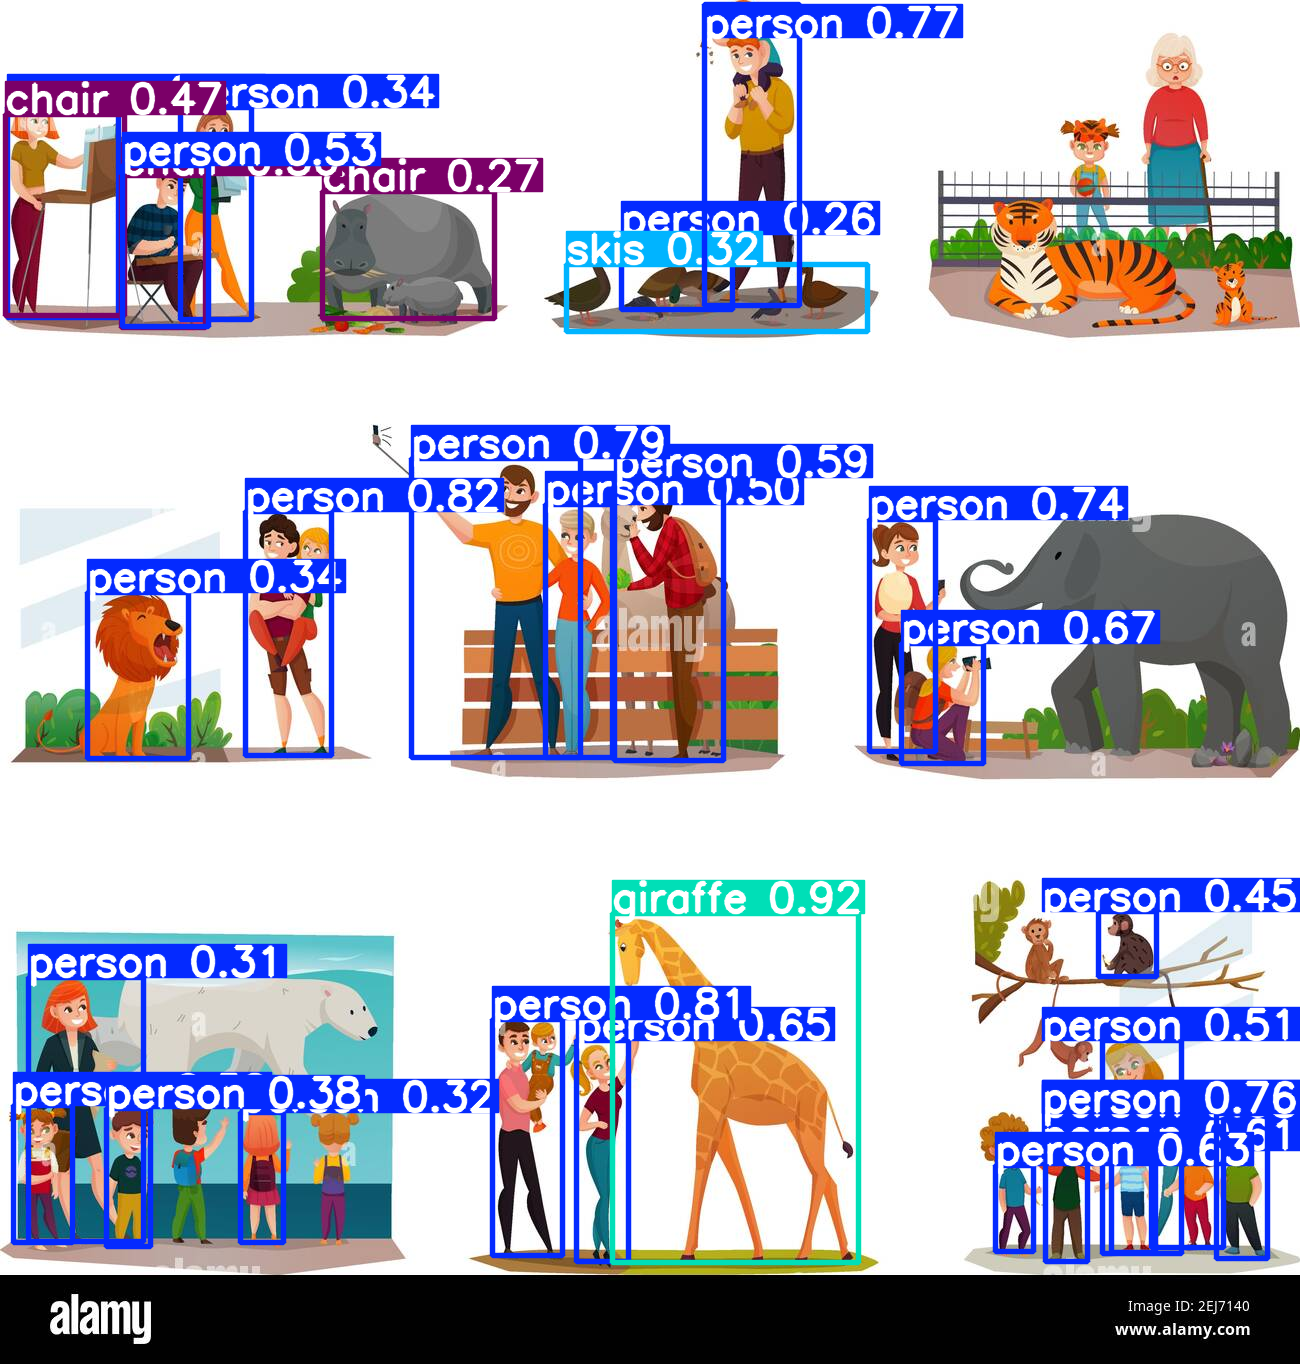

In [ ]:
import torch
# Load the trained YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/Object detection/best_model.pt', force_reload=True)

# Ask the user to upload an image
uploaded = files.upload()

# Get the image file name
image_path = list(uploaded.keys())[0]

# Load and preprocess the image
image = Image.open(image_path)
image = np.array(image)

# Perform inference
results = model(image)
results.show()